# **SME5975 - Estatística na Ciência da Computação**

## **Alunos:**
### João Matheus Siqueira Souza (10309100)
### Samuel Thomaz Bastos (9866322)

## **Proposta do trabalho :**

Analisar o *dataset* _Music_DB.xlsx_, buscando responder à pergunta:

`
Quais sensações são geradas quando você ouve uma música?
`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_df = pd.read_excel('Music_DB.xlsx')

## Análise inicial dos parâmetros do _dataset_

In [3]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7702 entries, 0 to 7701
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energia        7702 non-null   float64
 1   Ao_vivo        7702 non-null   float64
 2   Tempo          7702 non-null   float64
 3   Falado         7702 non-null   float64
 4   Orgânico       7702 non-null   float64
 5   Instrumental   7702 non-null   float64
 6   Compasso       7702 non-null   int64  
 7   Dançabilidade  7702 non-null   float64
 8   Tom            7702 non-null   int64  
 9   Duração        7702 non-null   int64  
 10  Força          7702 non-null   float64
 11  Positividade   7702 non-null   float64
 12  Modo           7702 non-null   int64  
 13  Tipo           7702 non-null   object 
 14  Music_id       7702 non-null   object 
 15  Playlist_name  7702 non-null   object 
 16  Album_name     5674 non-null   object 
 17  Artista        5674 non-null   object 
 18  Music_na

O _dataset_ apresenta 7702 entradas e 19 colunas. A descrição das colunas não foi dada, porém, com base nas referências encontradas em [_Spotify_](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features), realizou-se as seguintes associações:

0. **Energia** : 

    `"Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."`

1. **Ao_vivo** : 

    `"Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."`

2. **Tempo** : 

    `"The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."`

3. **Falado** : 

    `"Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."`

4. **Orgânico** : 

    `"A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."`

5. **Instrumental** : 

    `"Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."`

6. **Compasso** : 

    `"An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4"."`

7. **Dançabilidade** : 

    `"Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."`

8. **Tom** : 

    `"The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1."`

9. **Duração** : 

    `"The duration of the track in milliseconds."`
    
10. **Força** : 

    `"The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db."`

11. **Positividade** : 

    `"A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."`

12. **Modo** : 

    `"Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0."`

13. **Tipo** : 

    `"The object type." Para esse _dataset_ é sempre igual à 'audio_features'.`

14. **Music_id** : 

    `"The Spotify ID for the track."`

15. **Playlist_name** : 

    `A playlist a qual a música foi atribuída, pertencente ao conjunto: {Sleepy, Relaxed, Peaceful, Pleased, Calm, Nervous, Happy, Boring, Angry, Excited, Sad, Annoying}`
16. **Album_name** : 

    `Nome do álbum que a música pertence.`

17. **Artista** : 

    `Nome do/a artista/banda que gravou a música.`

18. **Music_name** : 

    `Nome da música`.

In [4]:
music_df.describe()

Energia      Ao_vivo        Tempo       Falado     Orgânico  \
count  7702.000000  7702.000000  7702.000000  7702.000000  7702.000000   
mean      0.461560     0.159612   113.737695     0.066433     0.486352   
std       0.335351     0.135808    31.989253     0.063606     0.412783   
min       0.000081     0.022400     0.000000     0.000000     0.000000   
25%       0.113000     0.094300    88.666000     0.036900     0.037000   
50%       0.474000     0.110000   114.061500     0.045200     0.458500   
75%       0.770000     0.157000   133.418250     0.066600     0.944000   
max       1.000000     0.988000   236.136000     0.896000     0.996000   

       Instrumental     Compasso  Dançabilidade          Tom       Duração  \
count   7702.000000  7702.000000    7702.000000  7702.000000  7.702000e+03   
mean       0.398859     3.847962       0.494276     5.020774  2.121874e+05   
std        0.429689     0.568963       0.214944     3.567784  7.361206e+04   
min        0.000000     0.000000       0.000000     0.000000  2.430600e+04   
25%        0.000010     4.000000       0.334000     2.000000  1.680400e+05   
50%        0.076500     4.000000       0.516000     5.000000  2.035070e+05   
75%        0.896000     4.000000       0.662000     8.000000  2.400902e+05   
max        1.000000     5.000000       0.986000    11.000000  1.116933e+06   

             Força  Positividade         Modo  
count  7702.000000   7702.000000  7702.000000  
mean      0.318622      0.361073     0.669566  
std       0.221473      0.267949     0.470400  
min       0.004240      0.000000     0.000000  
25%       0.091107      0.120000     0.000000  
50%       0.318603      0.321000     1.000000  
75%       0.506320      0.556000     1.000000  
max       0.971292      0.993000     1.000000

In [5]:
not_used_cols = ['Tipo', 'Music_id', 'Playlist_name', 'Album_name', 'Artista', 'Music_name', 'Modo', 'Tom', 'Compasso']

In [6]:
numerical_cols = music_df.drop(not_used_cols, axis = 1).columns

In [7]:
# as variáveis duração e tempo foram transormadas para ficarem na mesma ordem de grandeza das demais
from sklearn.preprocessing import MinMaxScaler
for col in ['Duração', 'Tempo']:
    scaler = MinMaxScaler()
    music_df[col] = scaler.fit_transform(music_df[[col]]).reshape(1,-1)[0]
    del scaler

In [8]:
mean_df = music_df[list(numerical_cols) + ['Playlist_name']].groupby('Playlist_name').mean() #.drop(['Duração', 'Tempo'], axis = 1)
std_df = music_df[list(numerical_cols) + ['Playlist_name']].groupby('Playlist_name').std() #.drop(['Duração', 'Tempo'], axis = 1)

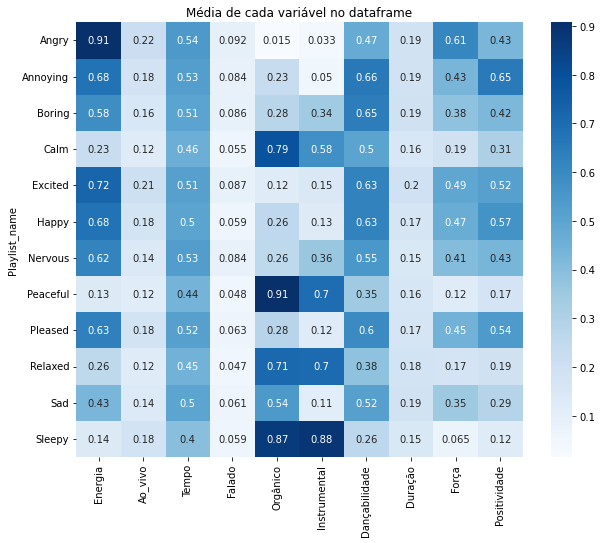

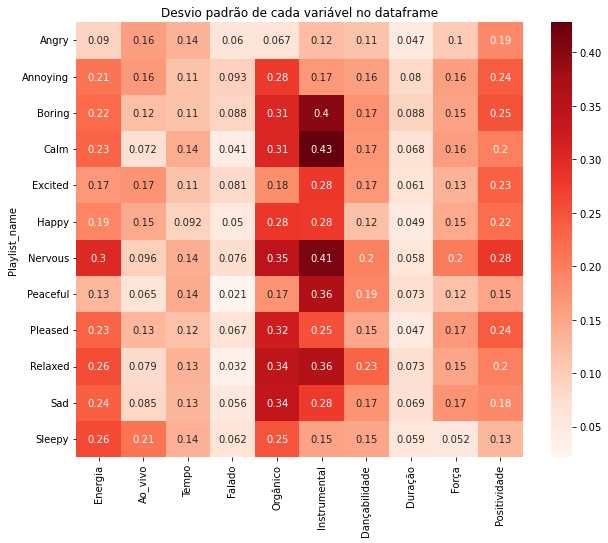

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data = mean_df,
    cmap= "Blues",
    annot=True
);
plt.title('Média de cada variável no dataframe');

plt.figure(figsize=(10,8))
sns.heatmap(
    data = std_df,
    cmap= "Reds",
    annot=True
);
plt.title('Desvio padrão de cada variável no dataframe');

## Verificando os tipos de música no dataset

In [10]:
music_df.Playlist_name.value_counts()

Sleepy      881
Relaxed     840
Peaceful    833
Pleased     678
Calm        635
Nervous     634
Happy       609
Boring      555
Angry       535
Excited     518
Sad         514
Annoying    470
Name: Playlist_name, dtype: int64

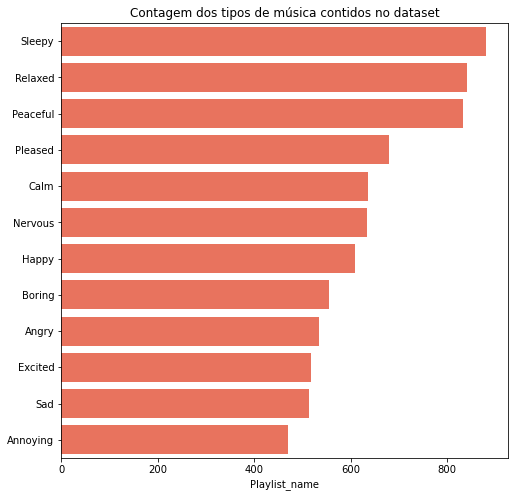

In [11]:
plt.figure(figsize=(8,8))
sns.barplot(y = music_df.Playlist_name.value_counts().index,  x = music_df.Playlist_name.value_counts(), color='tomato')
plt.title('Contagem dos tipos de música contidos no dataset')
plt.show()

## Análise de correlação de pearson entre as variáveis do dataset

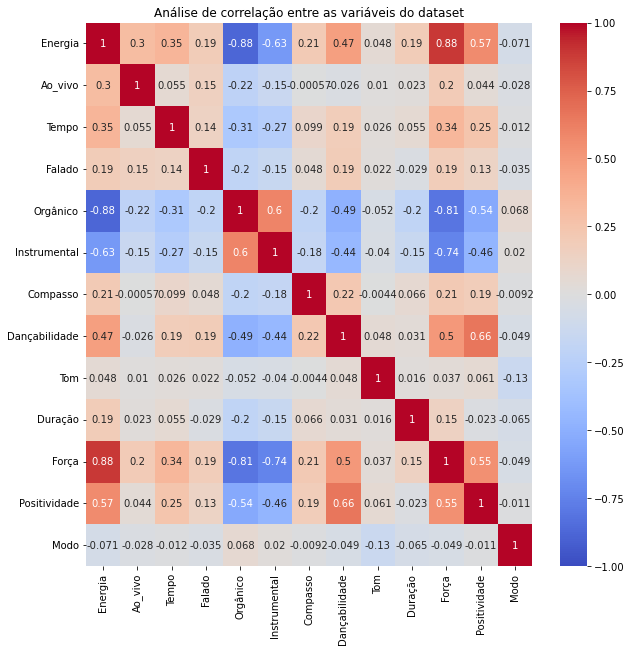

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(music_df.corr(), vmin = -1, vmax = 1, cmap='coolwarm', annot=True)
plt.title('Análise de correlação entre as variáveis do dataset')
plt.show()

- Podemos ver que as variáveis **Energia e Força** têm uma forte correlação positiva enquanto **Energia e Orgânico** e **Energia e Instrumental** têm correlação negativa
- Podemos ver que **Positividade** está relacionado positivamente com **Força, Energia e Dançabilidade**, e negativamente com **Ôrgânico e Instrumental**

## Pairplot das variáveis

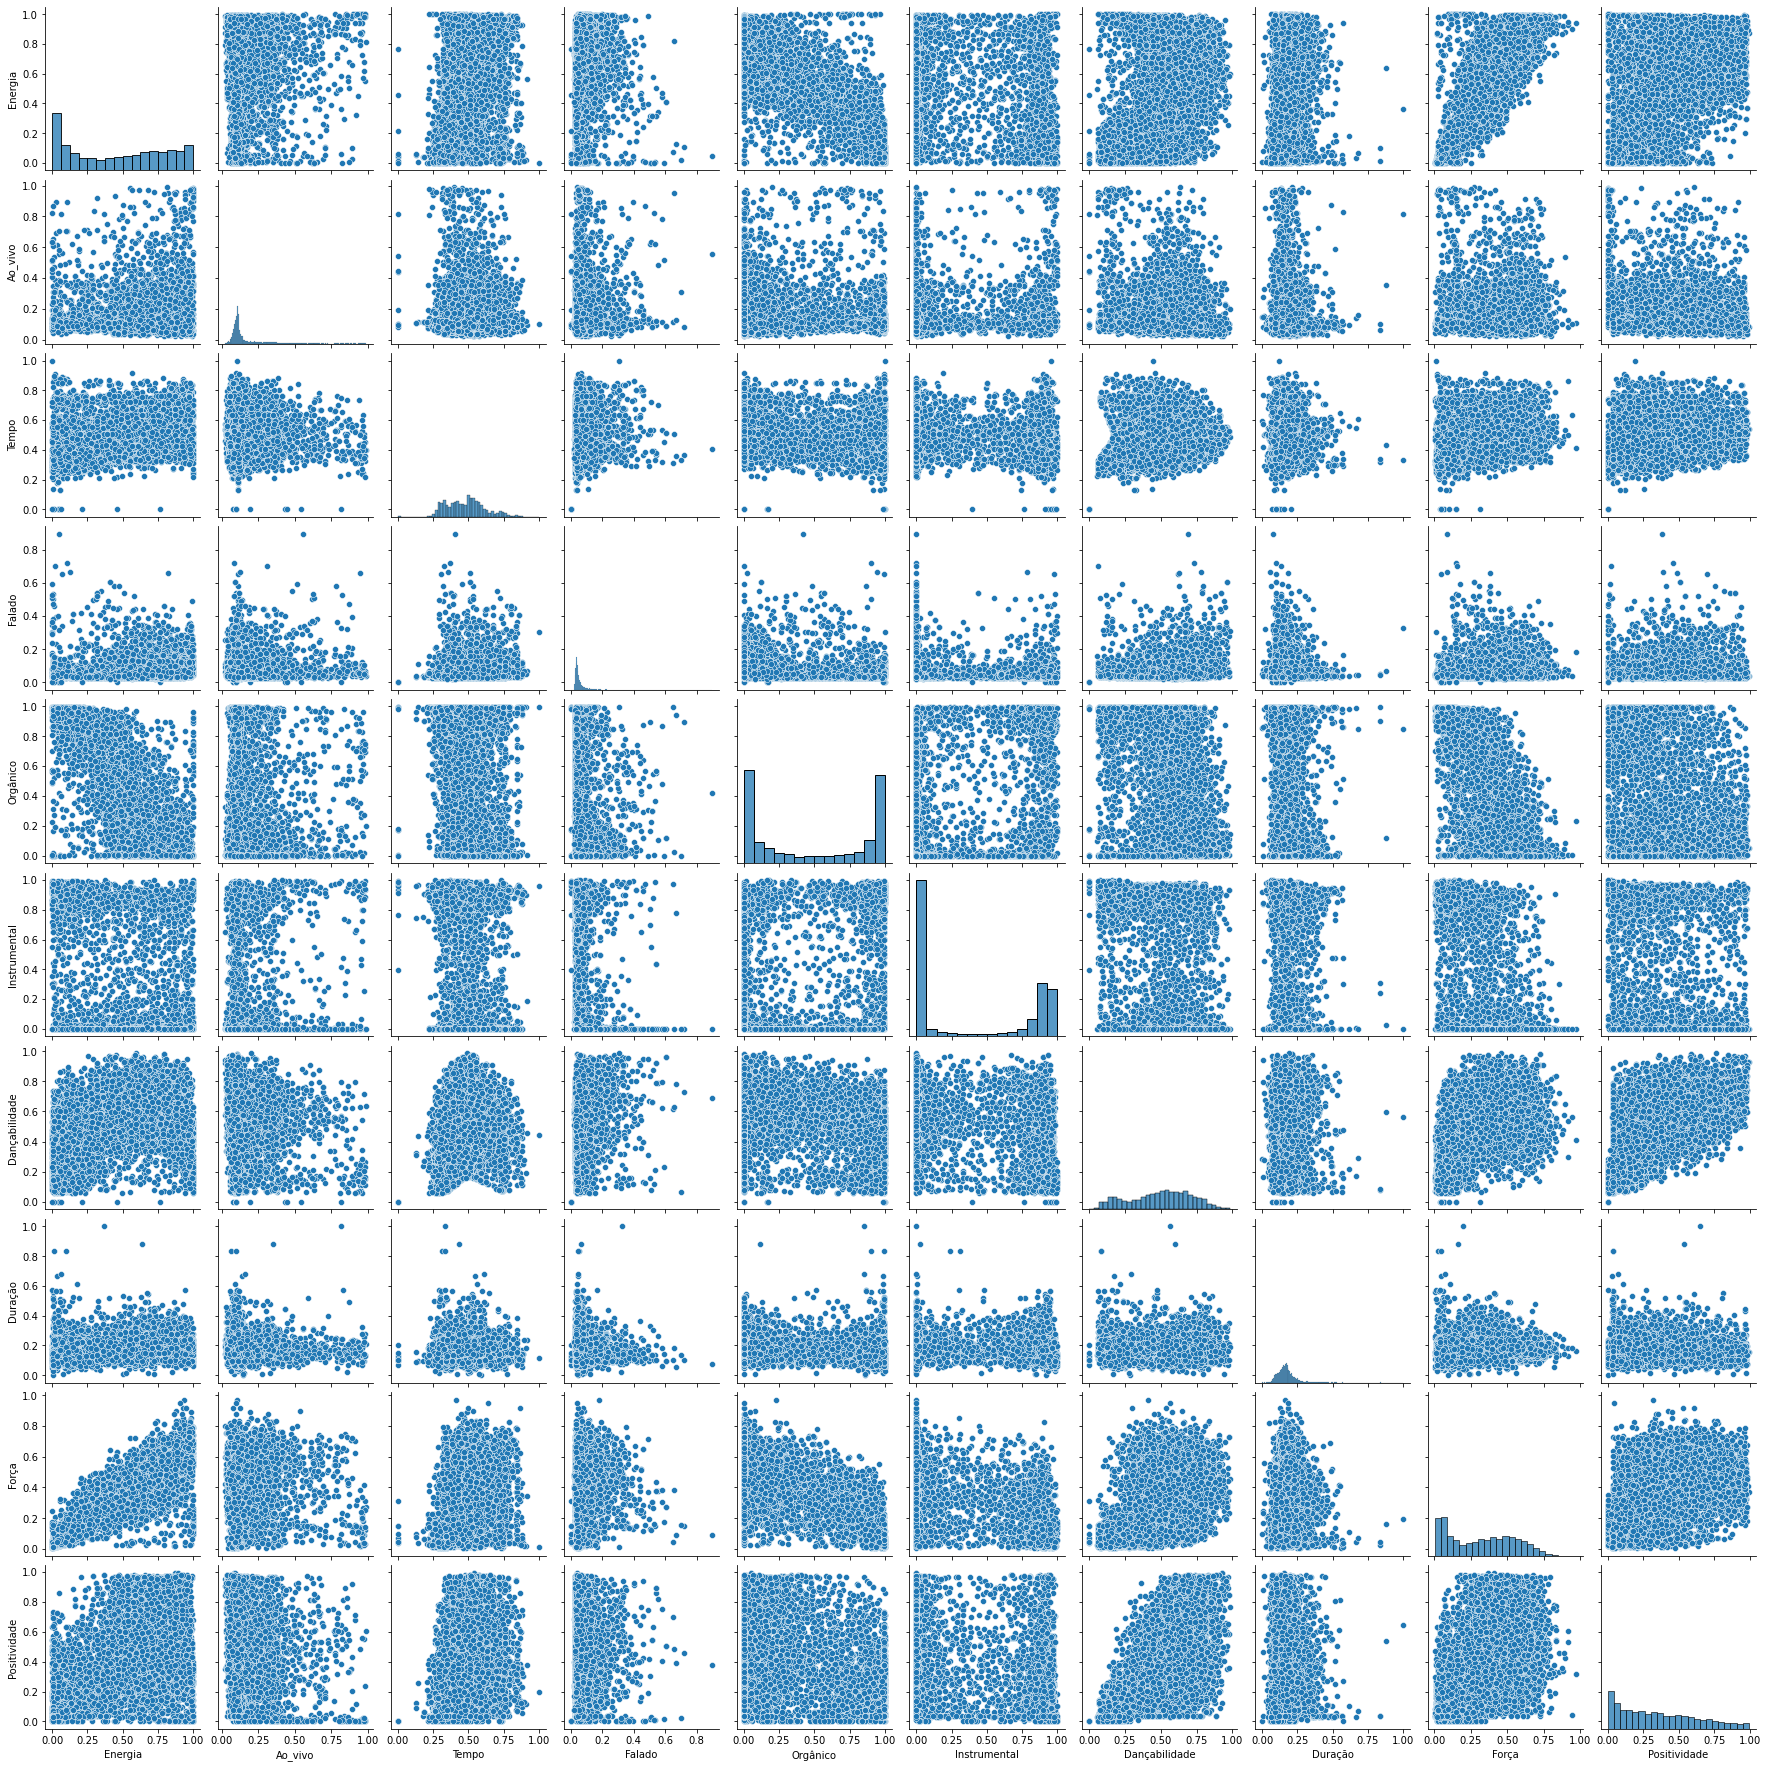

In [13]:
sns.pairplot(music_df.drop(not_used_cols, axis = 1))

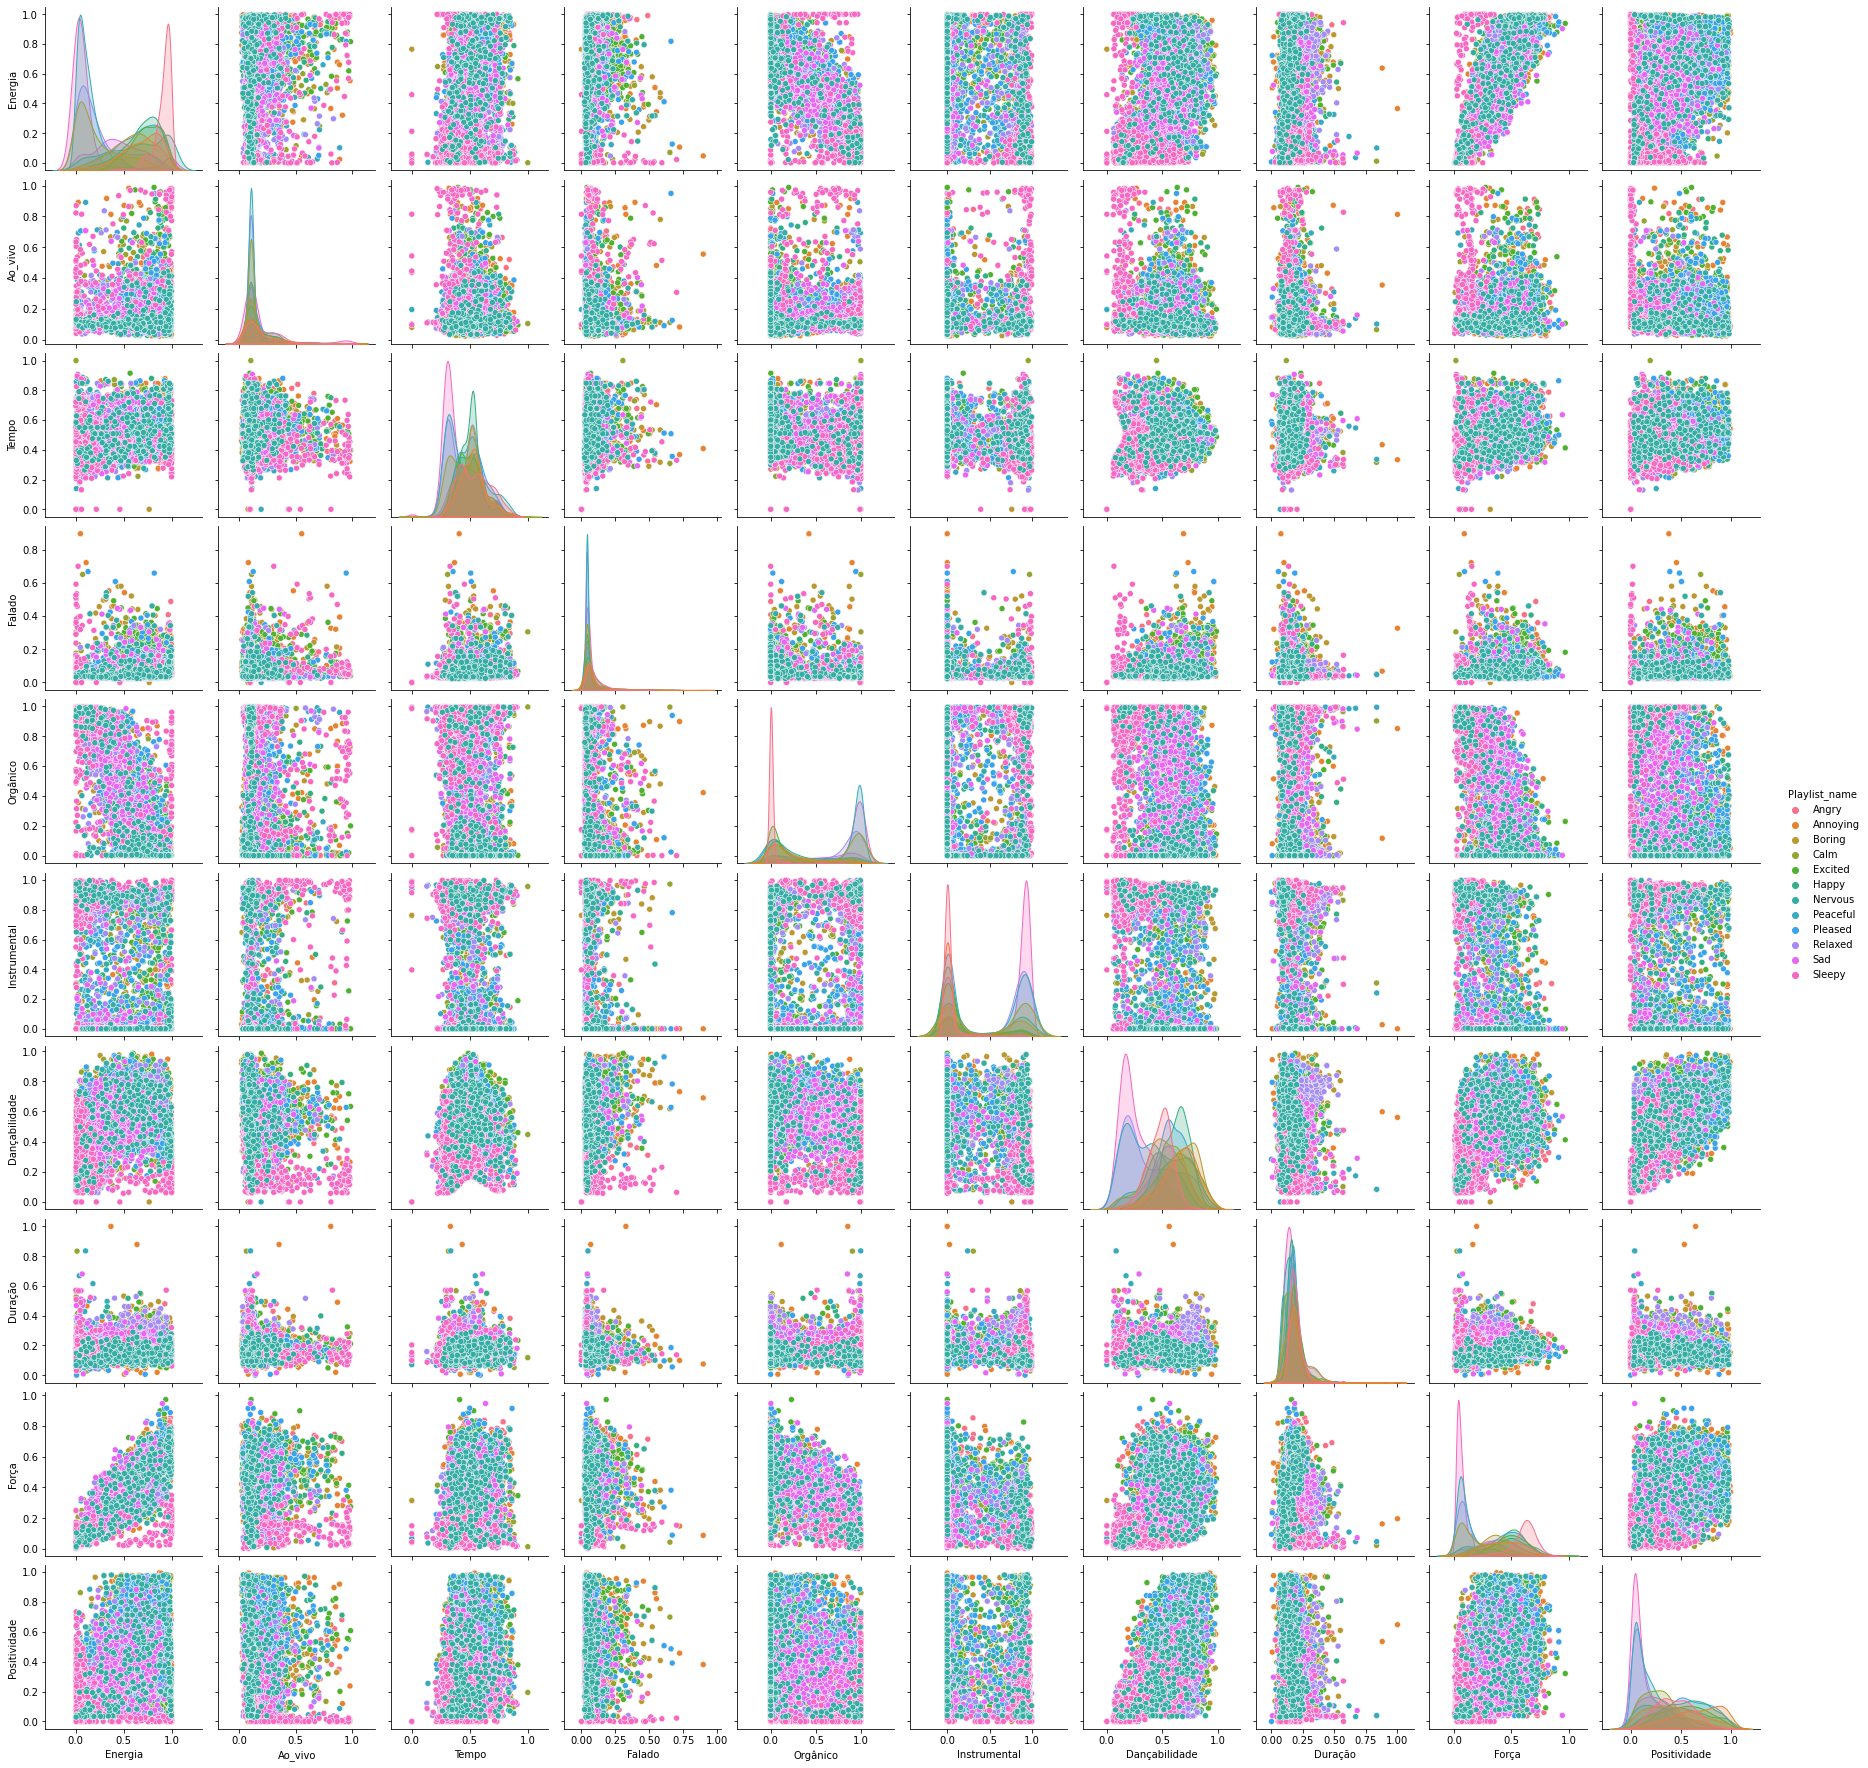

In [14]:
sns.pairplot(music_df, vars = numerical_cols, hue='Playlist_name')

Como pode ser observado dos _pairplots_ acima, há pouca separação entre as variáveis.

## Análise geral de distrbuição

In [15]:
# Utilizando a regra da raíz para determinar o número de bins dos histogramas
n_bins = int(np.round(np.sqrt(len(music_df))))

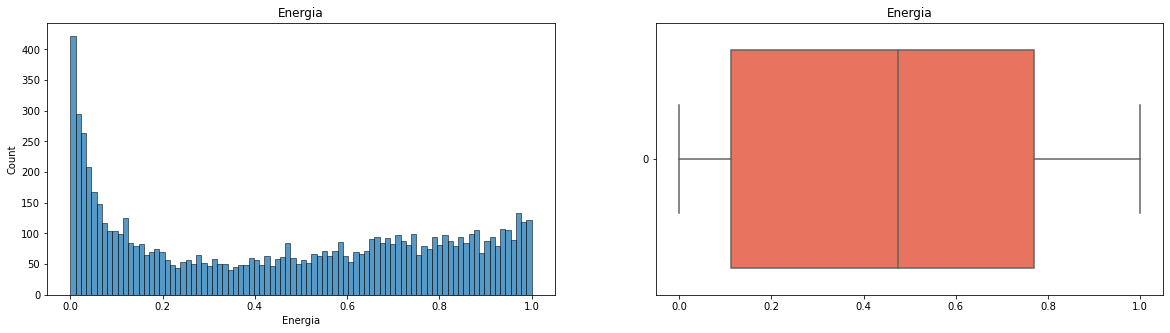

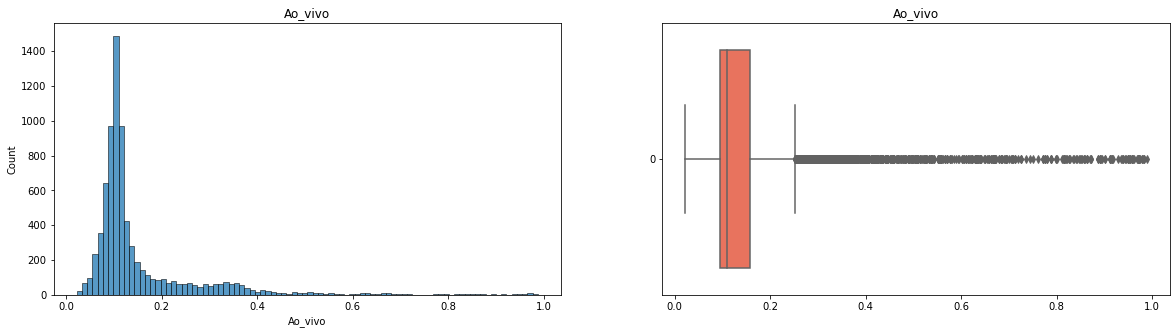

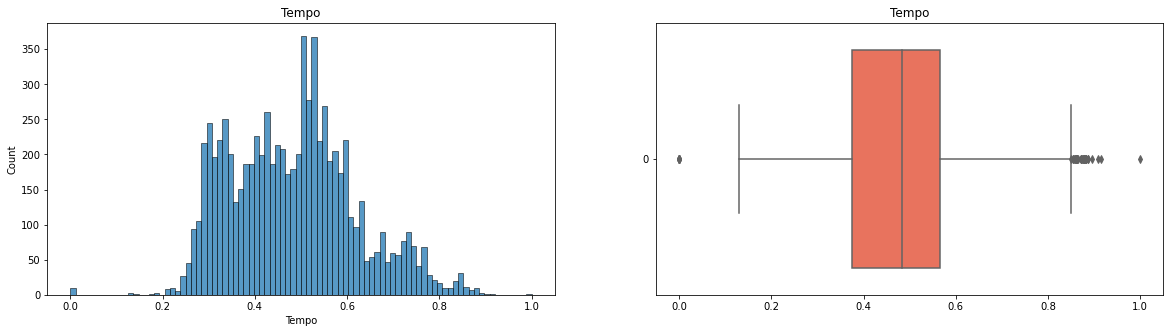

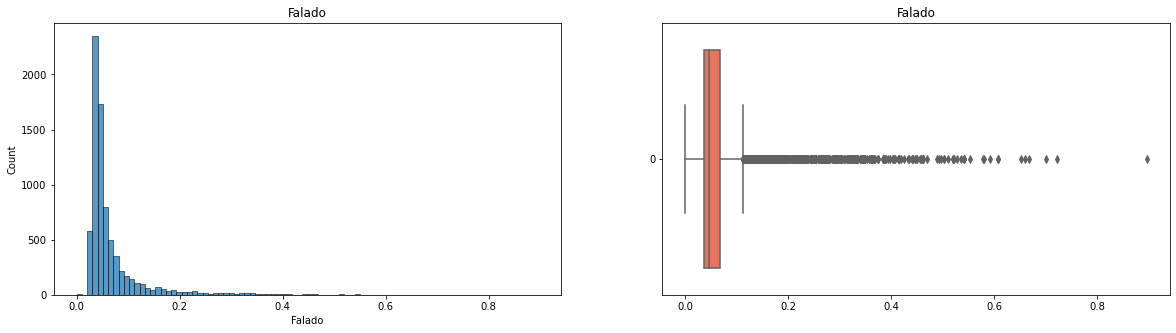

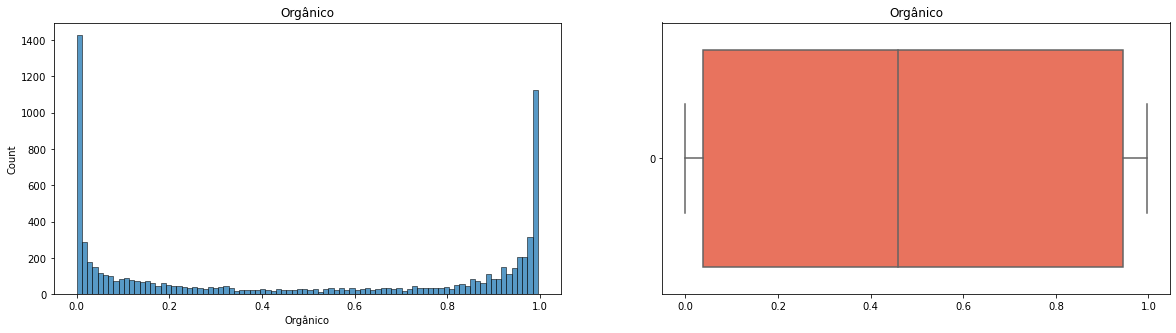

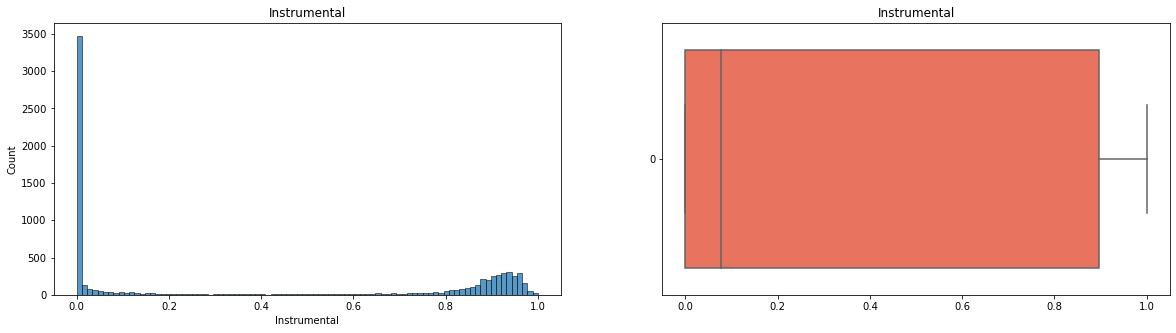

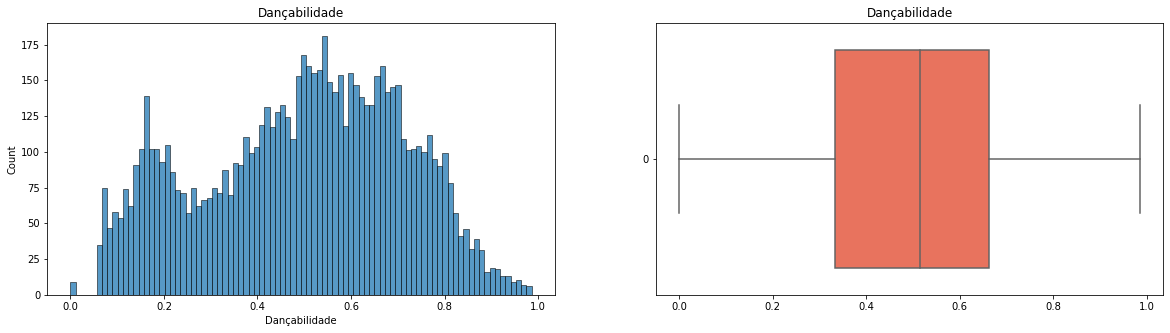

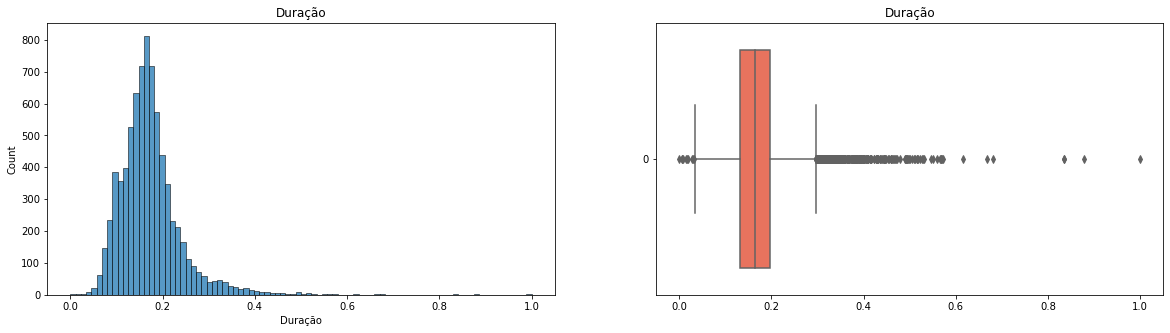

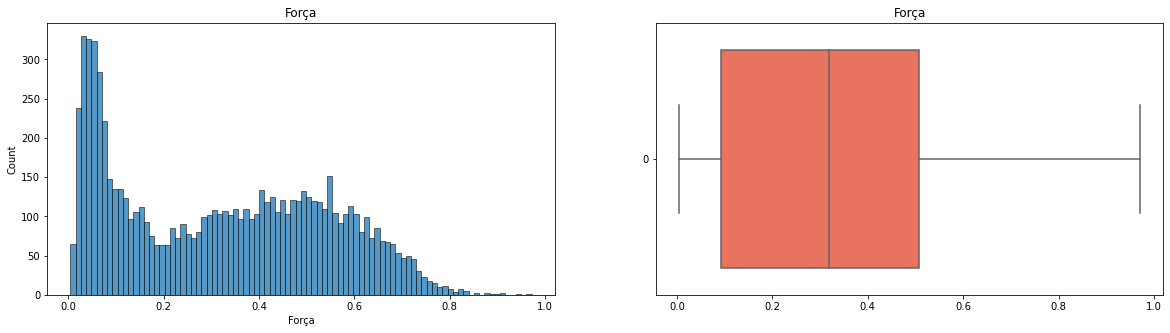

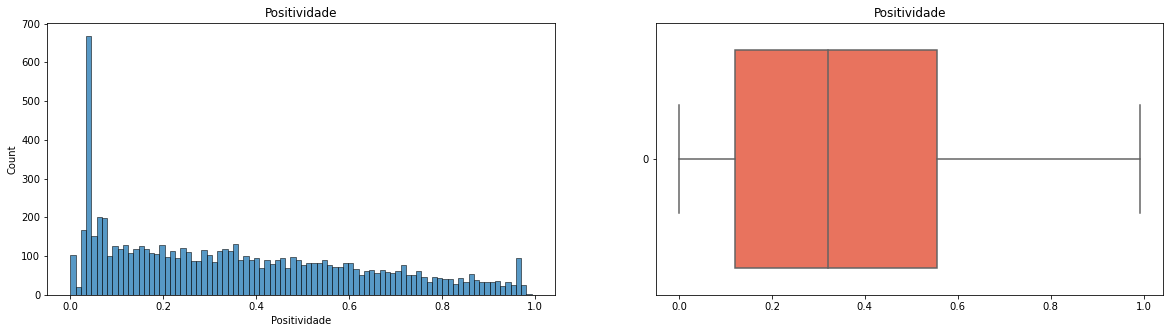

In [16]:
for col in numerical_cols:
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    # sns.histplot(music_df[col])
    sns.histplot(music_df[col], bins=n_bins)
    plt.title(col)
    
    plt.subplot(1,2,2)
    sns.boxplot(data = music_df[col], orient='h', color = 'tomato')
    plt.title(col)
    plt.show()

## Análise de variáveis categóricas

Podemos considerar variáveis categóricas:
- Compasso
- Tom
- Modo
- Artista
- Album_name 
- Playlist_name 

Para a finalidade destas análises, o nome da música não faz diferença, por isso não foi considerada.

In [17]:
cat_vars = ['Compasso', 'Tom', 'Modo', 'Playlist_name']
all_cat_vars = cat_vars + ['Artista', 'Album_name']

In [18]:
for col in music_df.columns:
    print(col, len(music_df[col].unique()))

Energia 1756
Ao_vivo 1100
Tempo 6093
Falado 988
Orgânico 2324
Instrumental 2343
Compasso 5
Dançabilidade 1001
Tom 12
Duração 6029
Força 5724
Positividade 1432
Modo 2
Tipo 1
Music_id 6722
Playlist_name 12
Album_name 4228
Artista 3112
Music_name 4747


In [19]:
for col in cat_vars:
    print(col, (music_df[col].unique()))

Compasso [4 3 5 1 0]
Tom [10  8  9  3 11  6  7  0  2  5  4  1]
Modo [0 1]
Playlist_name ['Angry' 'Annoying' 'Boring' 'Calm' 'Excited' 'Happy' 'Nervous' 'Peaceful'
 'Pleased' 'Relaxed' 'Sad' 'Sleepy']


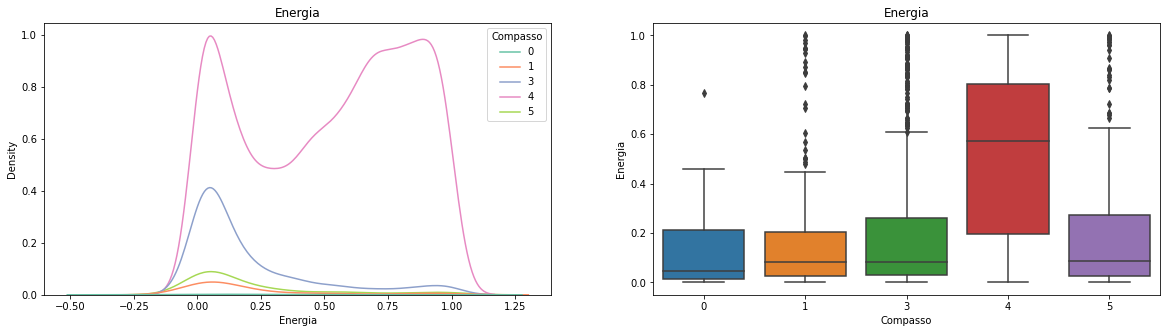

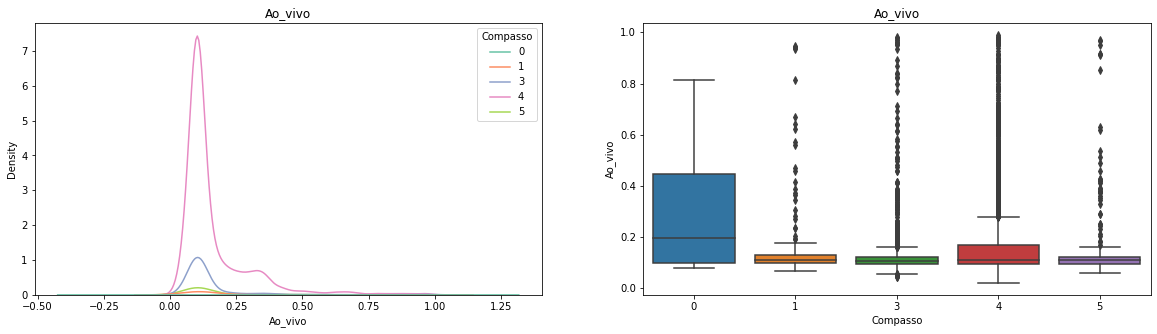

/Users/joaosiqueira/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


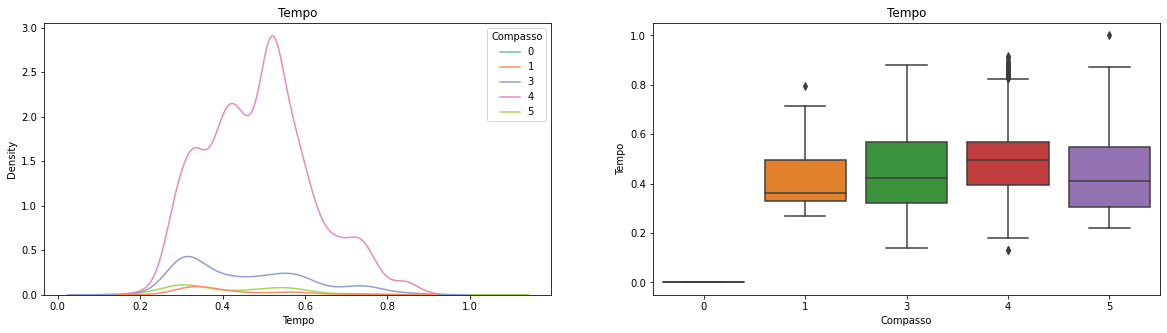

/Users/joaosiqueira/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


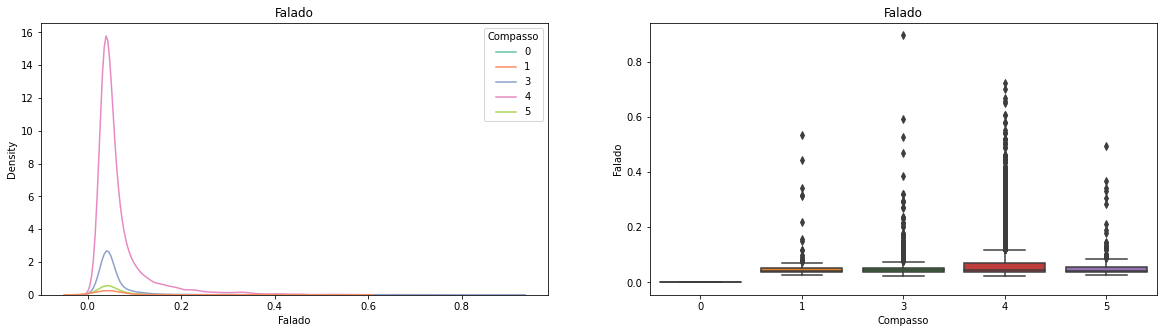

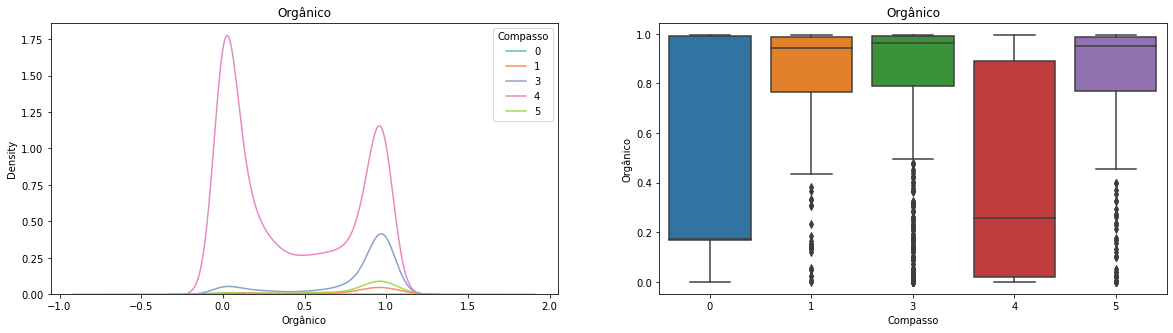

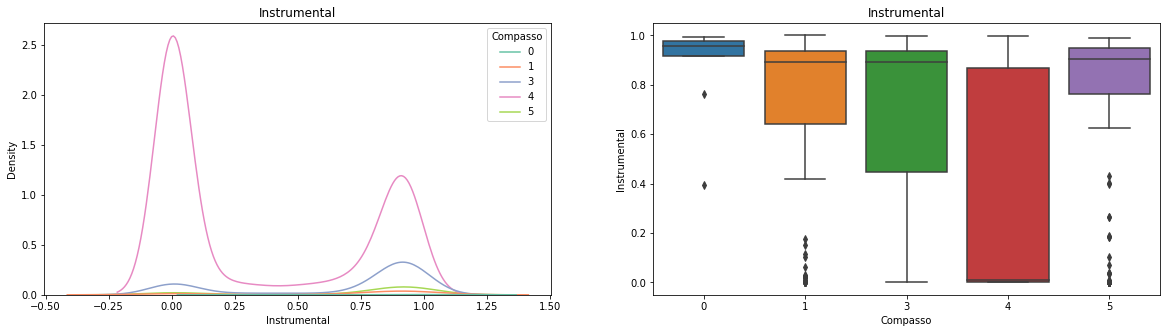

/Users/joaosiqueira/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


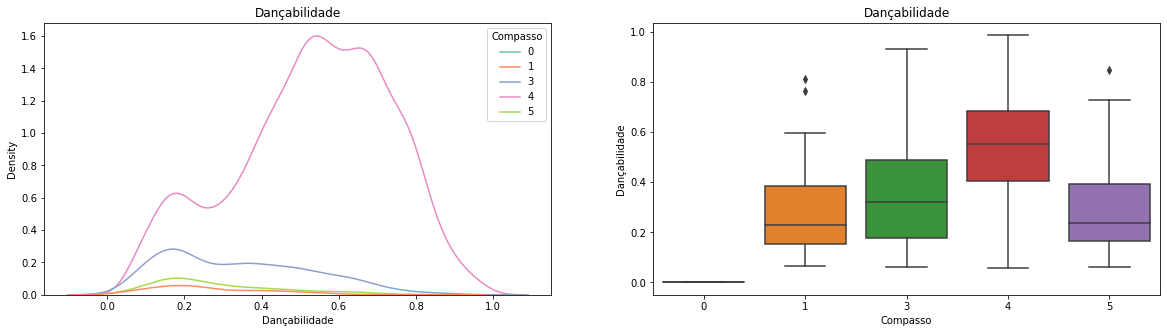

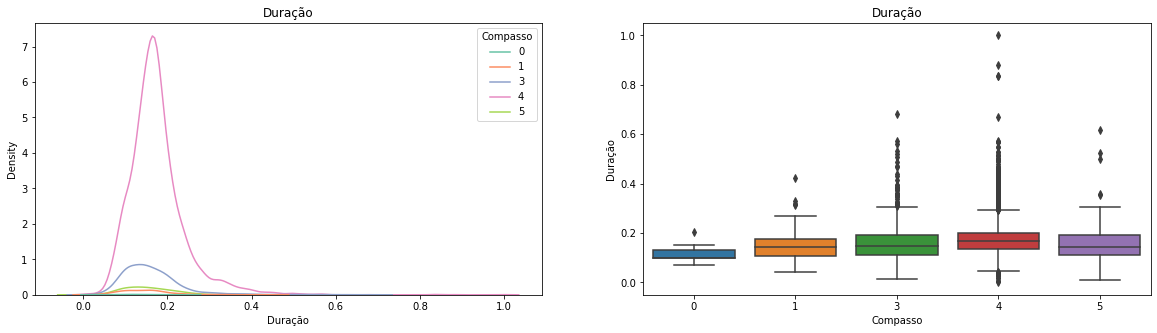

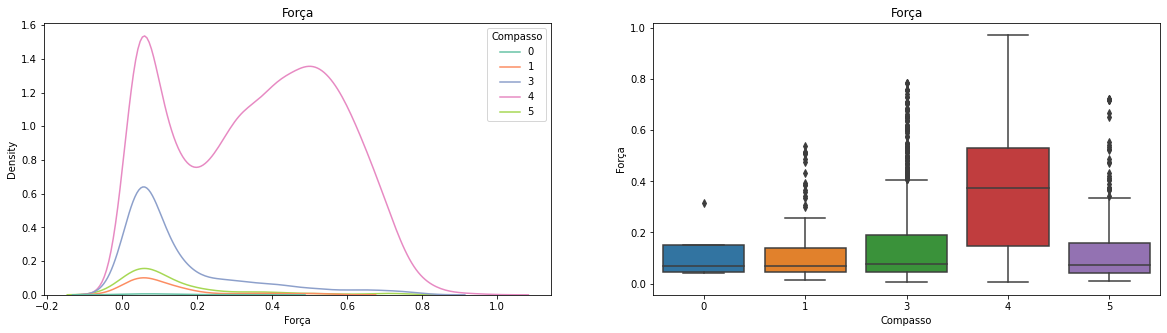

/Users/joaosiqueira/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


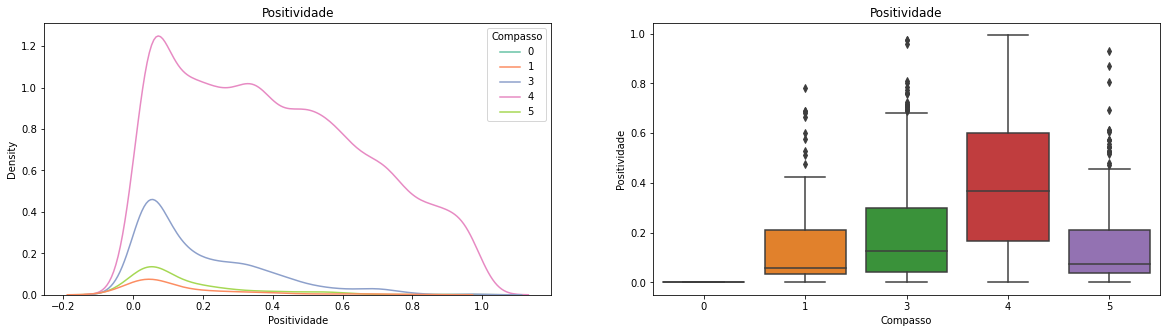

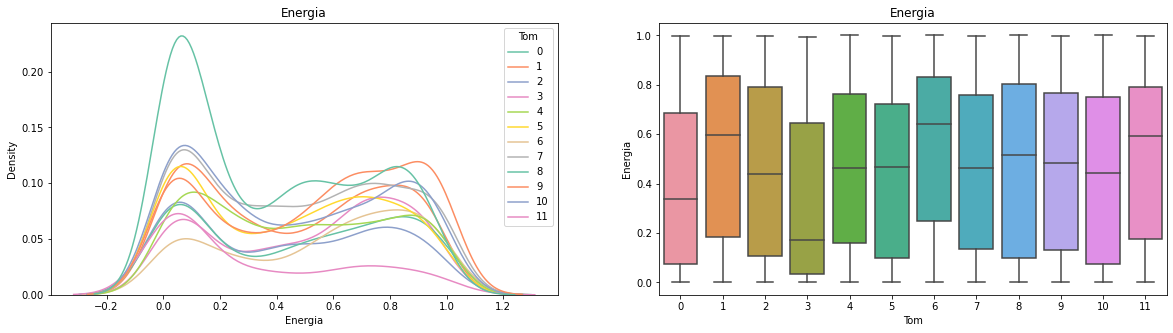

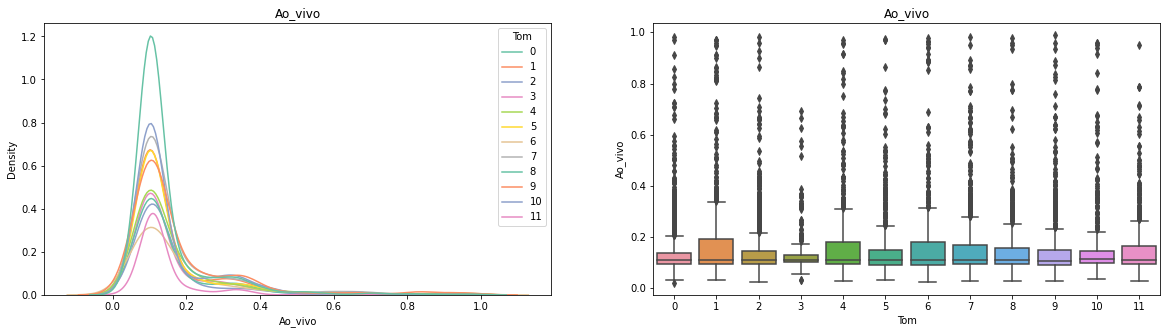

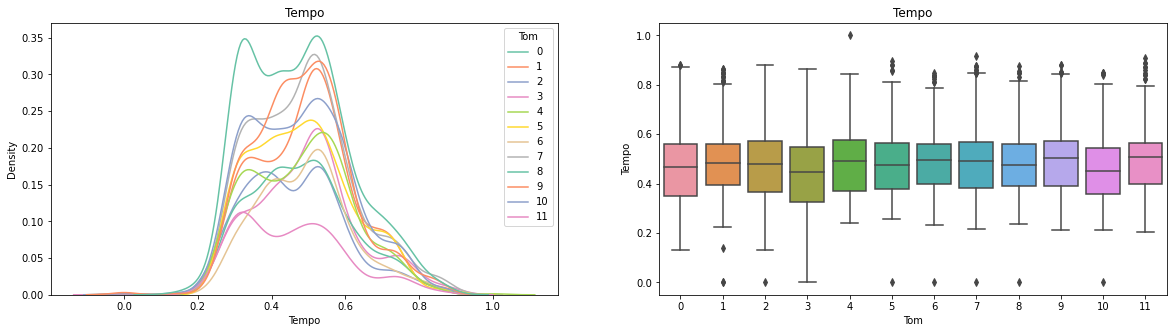

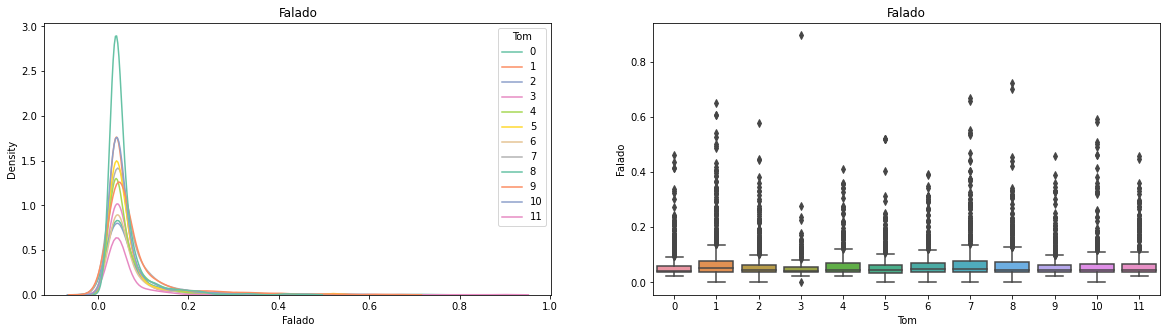

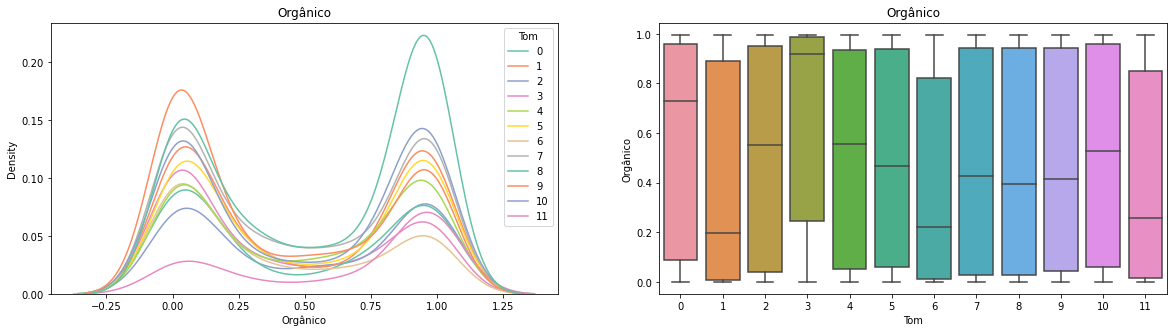

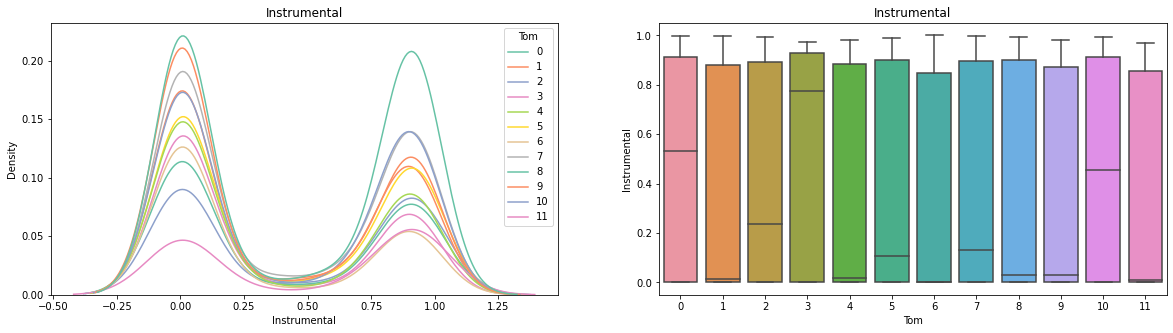

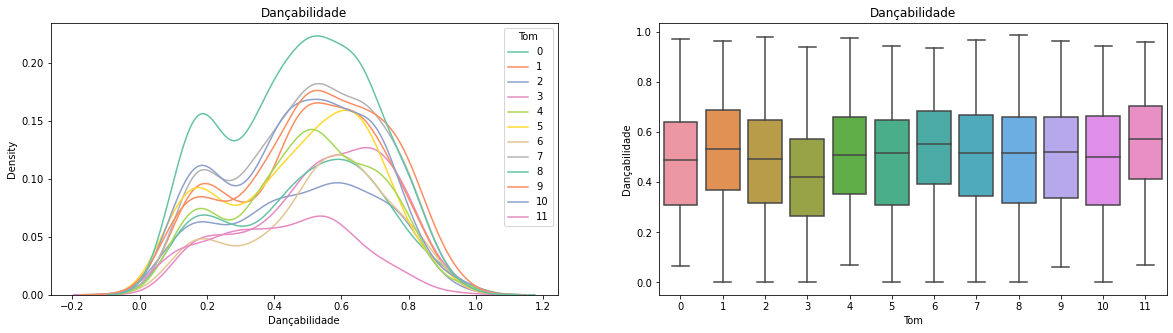

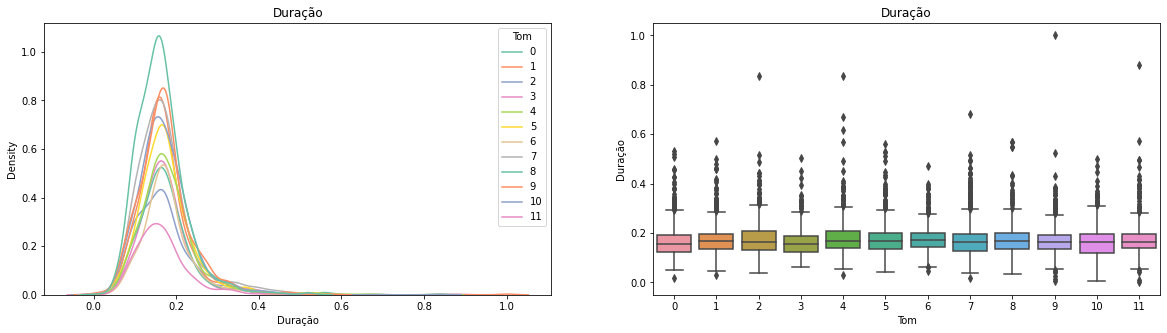

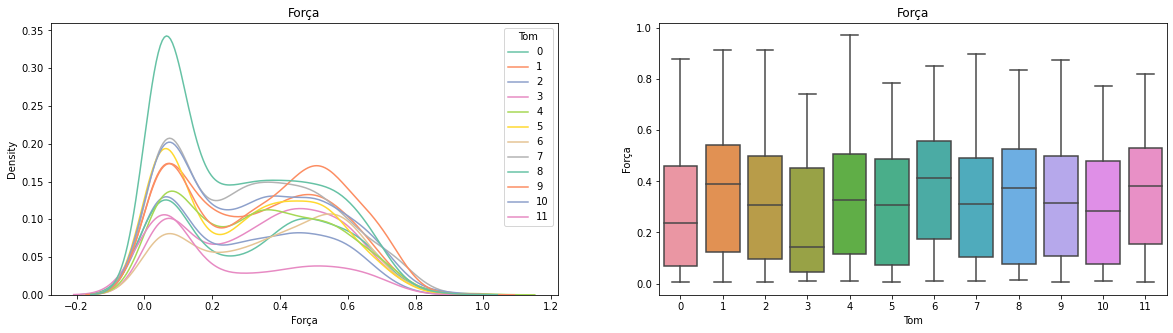

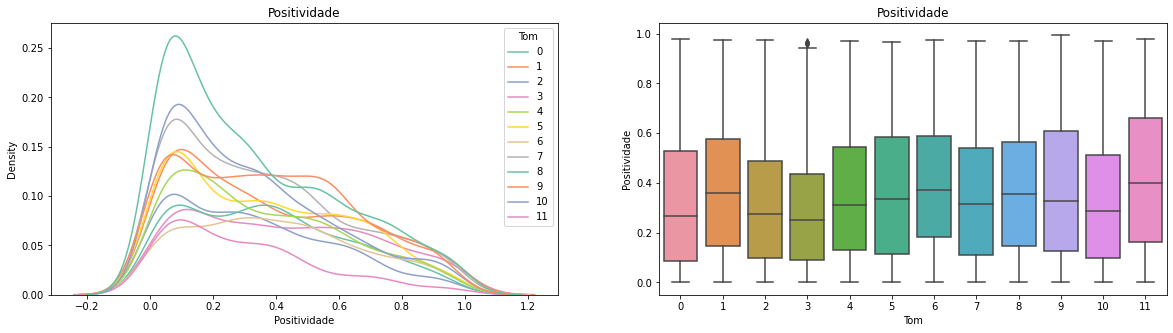

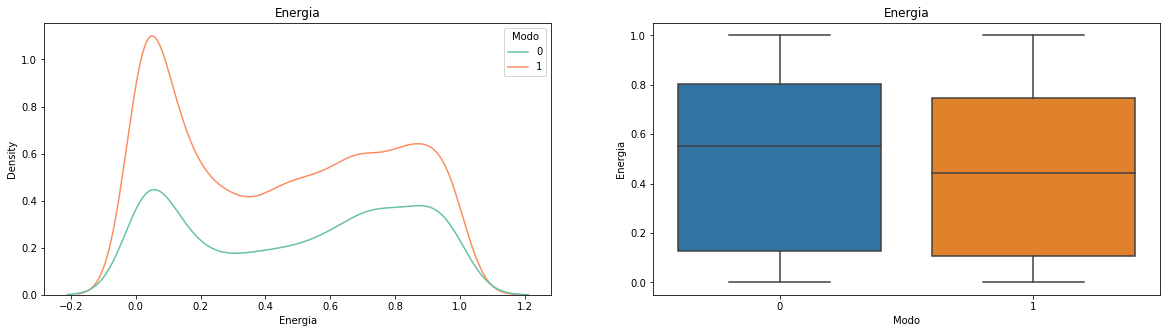

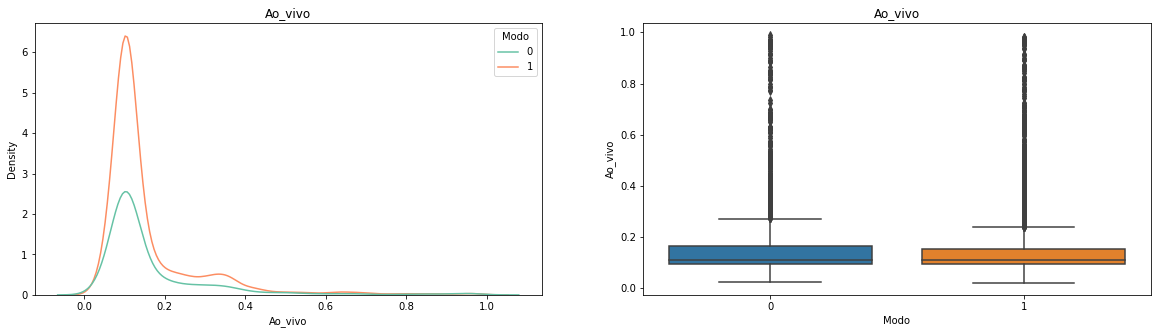

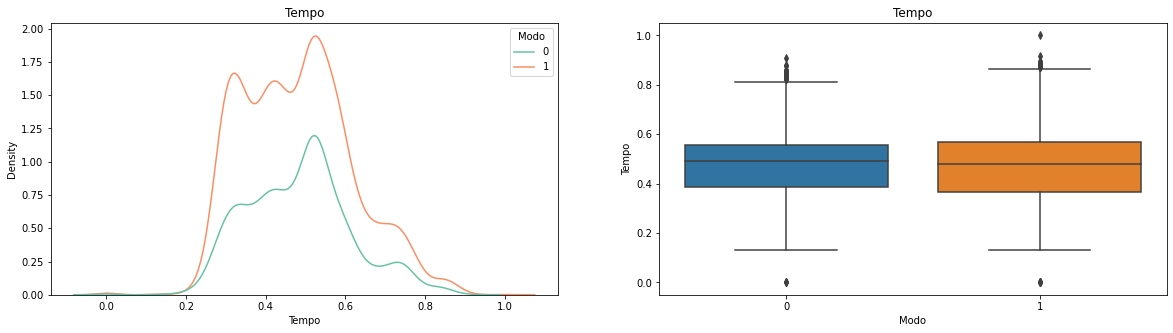

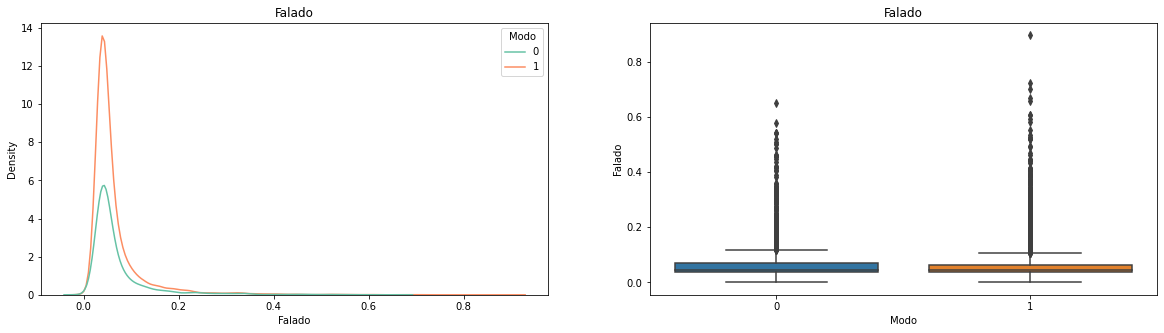

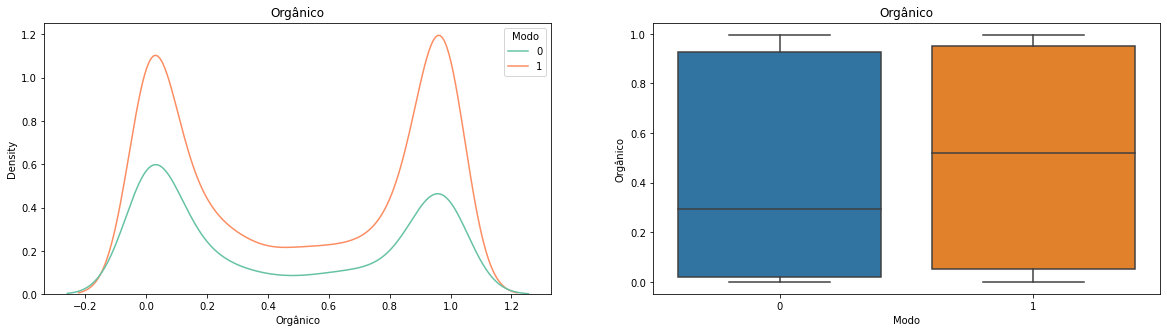

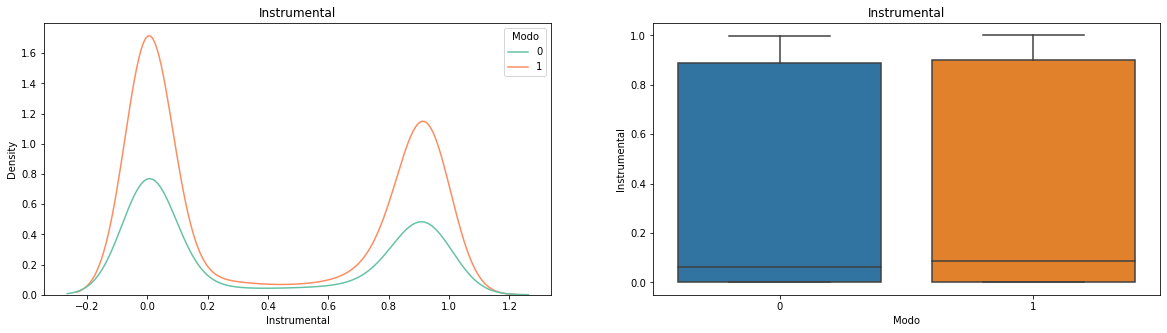

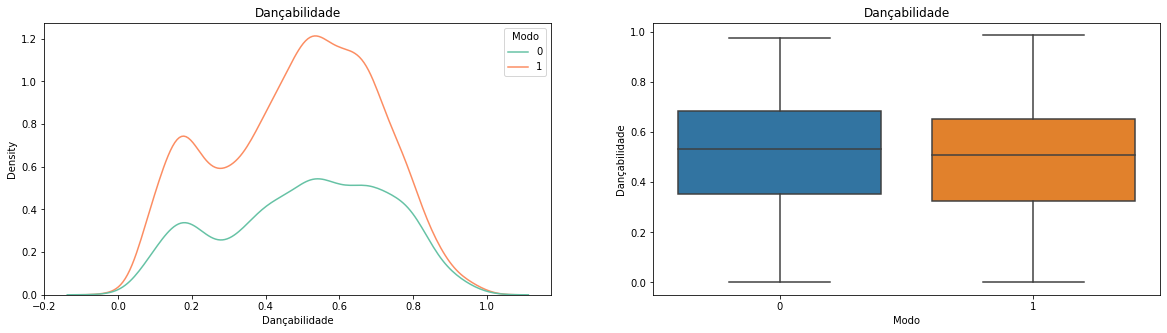

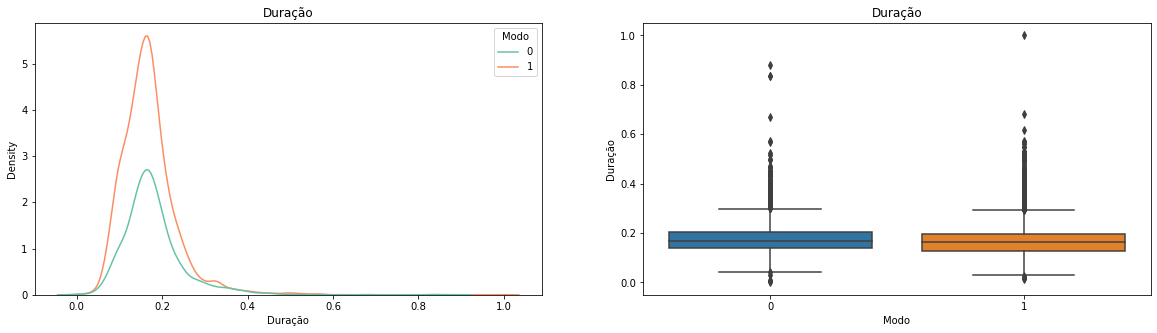

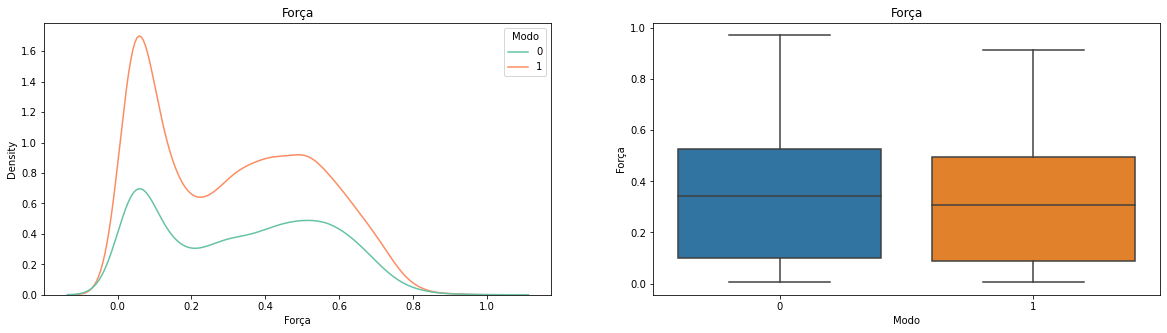

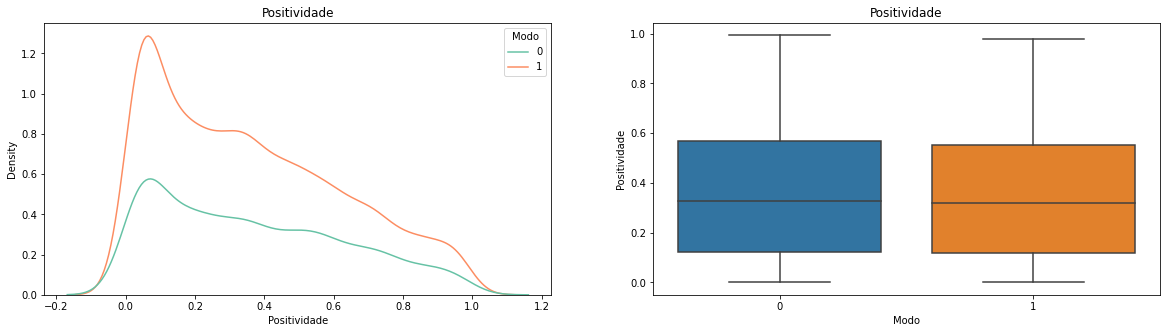

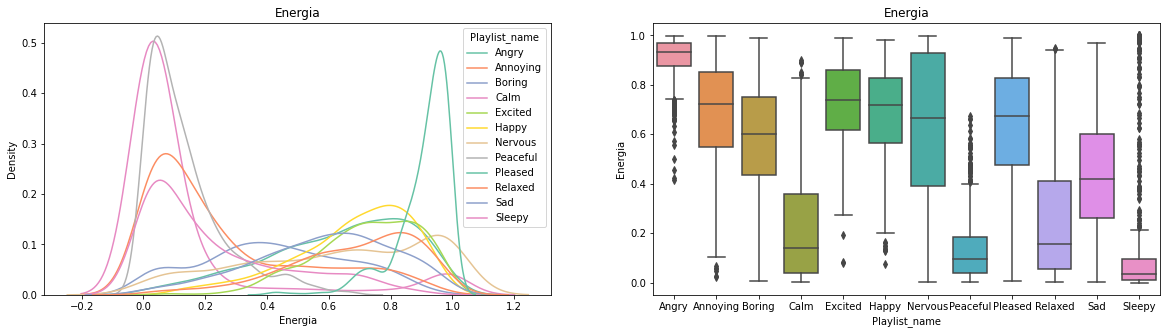

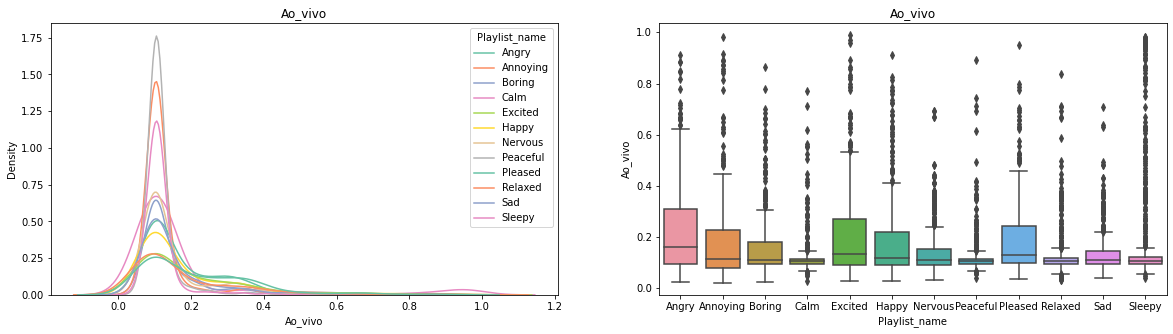

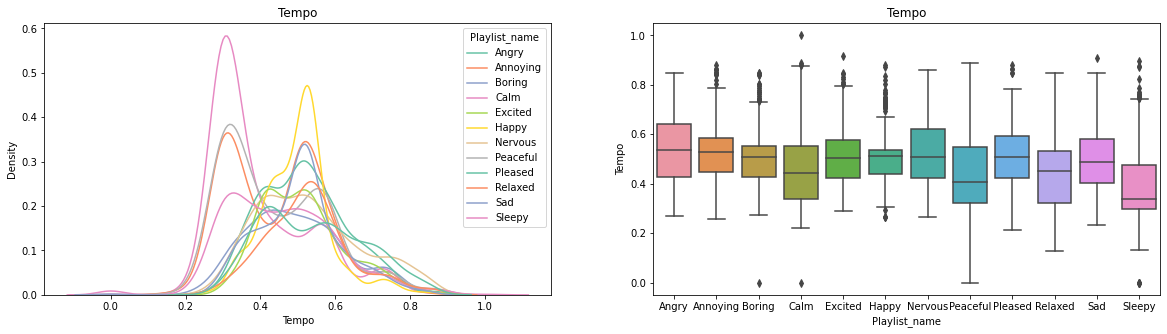

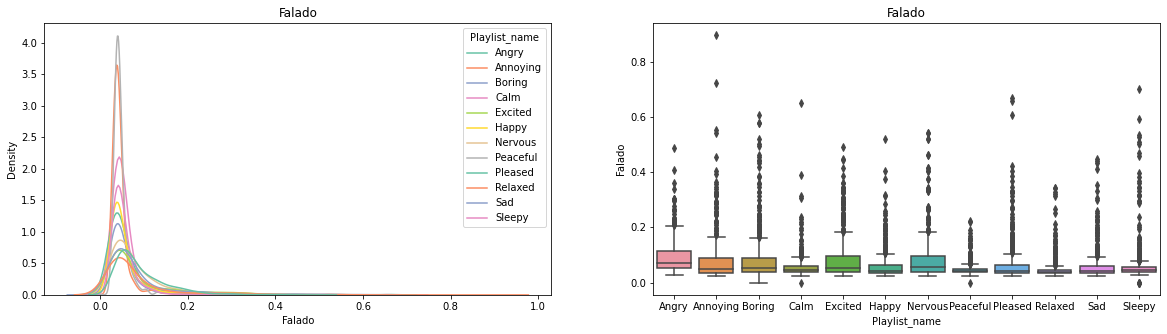

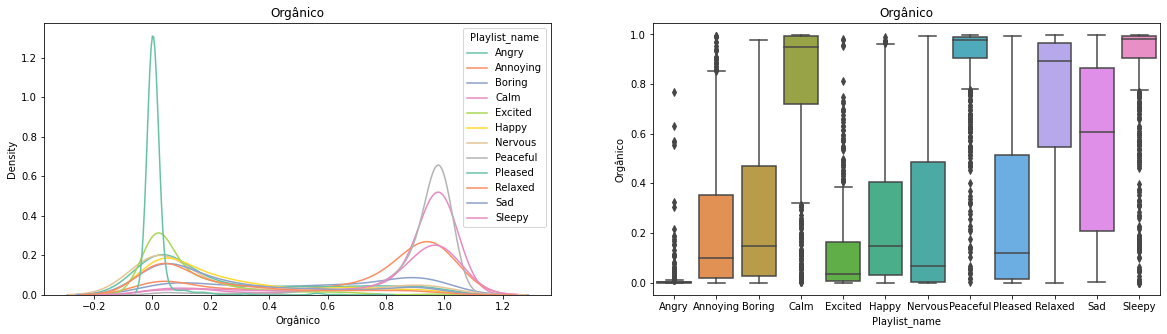

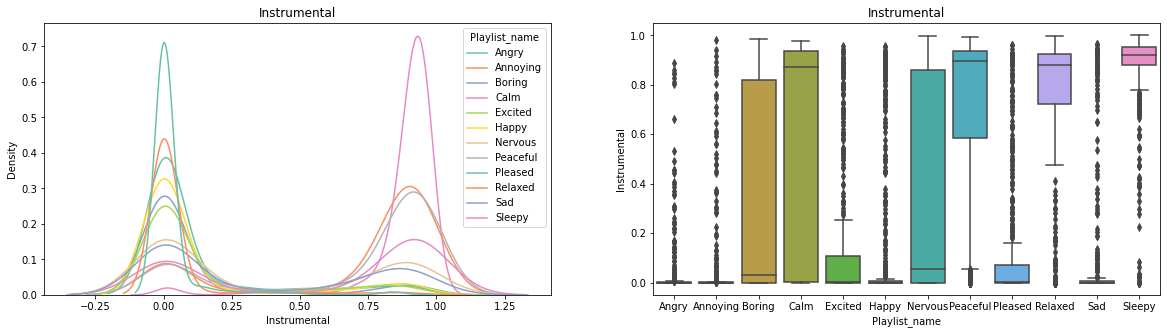

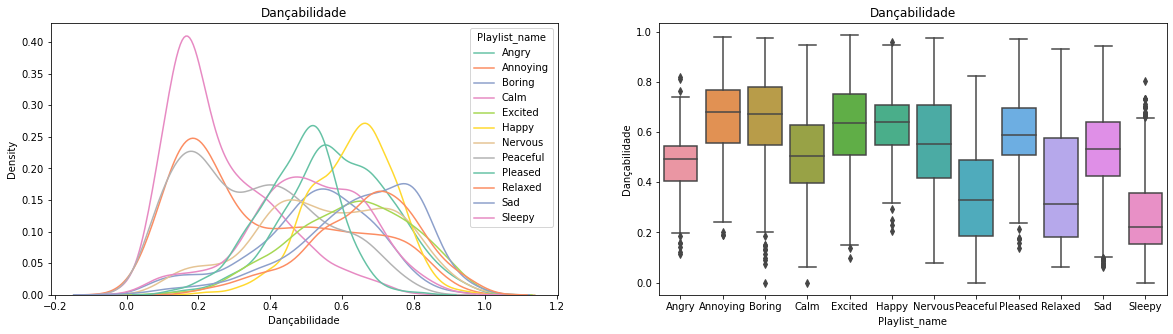

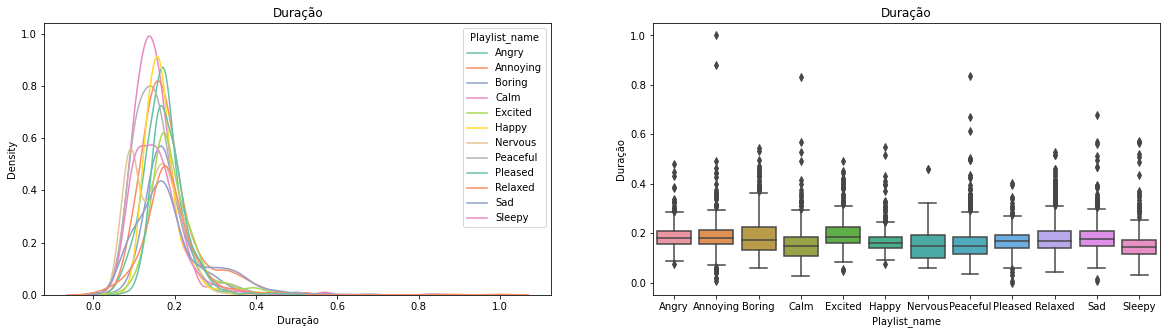

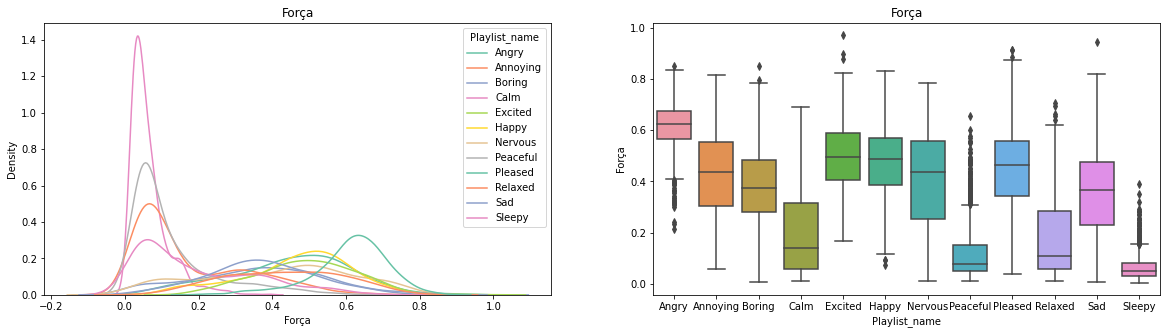

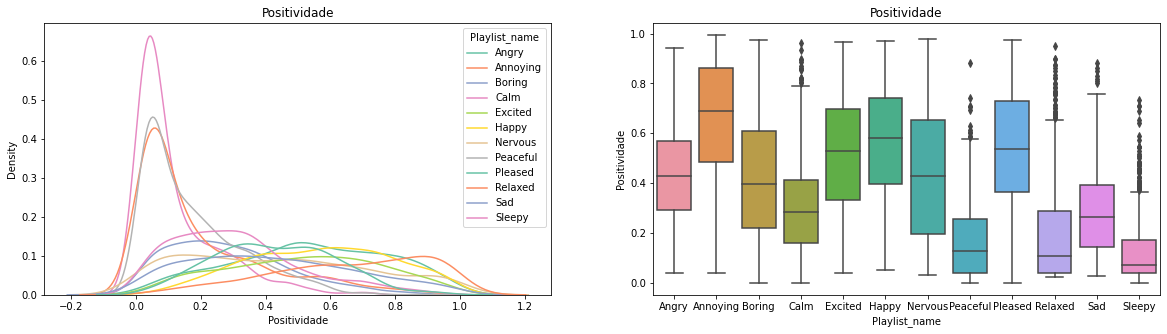

In [20]:
for cat_col in cat_vars:    
    for num_col in numerical_cols:        
        plt.figure(figsize=(20,5))
        
        plt.subplot(1,2,1)
        sns.kdeplot(data = music_df, x = num_col, hue=cat_col, palette= "Set2")
        plt.title(num_col)

        plt.subplot(1,2,2)
        sns.boxplot(data = music_df, x = cat_col, y = num_col, orient='v')
        plt.title(num_col)
        plt.show()
        
#         break
#     break

Principais insights:

- Músicas com o **Compasso** da classe '4' tendem a ter maior **Energia, Dançabilidade, Força e Positividade**;
- Músicas com **Tons** diferentes apresentam menor variação nas variáveius numéricas que músicas com **Compassos** diferentes;
- De maneira geral, músicas, **Calm, Peacefuk, Relaxed e Sleepy** têm valores de **Energia, Dançabilidade, Força e Positividade** mais baixas, enquanto **Angry, Annoying, Excited, Happy, Nervous e Pleased** têm valores mais altos.
- Músicas classificadas como **Angry** têm distribuições de _Energia_ e _Orgânica_ praticamente 'opostas' às músicas marcadas como **Sleepy e Peaceful**

## Verificando o tipo de música do Top 10 bandas no Dataset

## Verificando os artistas no dataset


In [21]:
music_df.Artista.value_counts().head(10)

Nervosa             72
Disturbed           63
Battle Beast        38
Shawn Mendes        31
Billie Eilish       31
Three Days Grace    31
Slipknot            29
Linkin Park         22
Imagine Dragons     21
The Weeknd          21
Name: Artista, dtype: int64

In [22]:
top_10_bandas = list(music_df.Artista.value_counts().head(10).index)

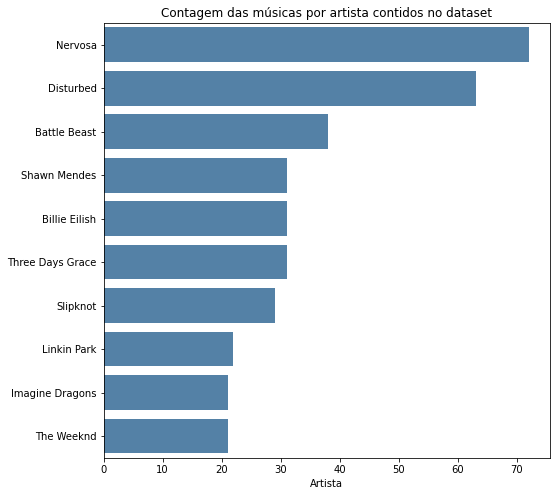

In [23]:
plt.figure(figsize=(8,8))
sns.barplot(y = top_10_bandas,  x = music_df.Artista.value_counts().head(10), color='steelblue')
plt.title('Contagem das músicas por artista contidos no dataset')
plt.show()

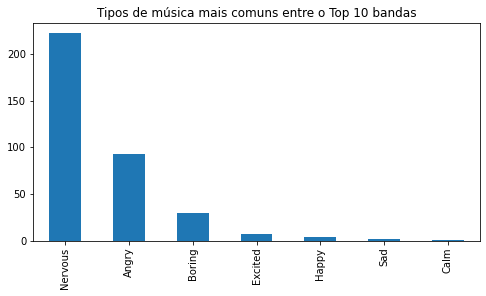

In [24]:
music_df.loc[music_df['Artista'].isin(top_10_bandas)].Playlist_name.value_counts().plot(kind= 'bar', figsize = (8,4), title = 'Tipos de música mais comuns entre o Top 10 bandas');